In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


## Load the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')

In [5]:
data.head(10)

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...
5,36,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_429400,u_1oKdRYcnvjnheo8Zyd0sWElYFdv,Cathy,1,1622648883,0,1,0,5,193,"Absolutely delicious! Easy, tasty and filling!"
6,96,17,36450,Fluffy Key Lime Pie,sp_aUSaElGf_36450_c_352563,u_1oKVpLXFmg8oIk8lHGHV0mcZb53,bybybaby,1,1622718115,0,0,0,4,100,Very good and summer good.
7,59,32,17310,Seafood Lasagna,sp_aUSaElGf_17310_c_159381,u_1oKVyiH3gFGjj0mLSnSazPegr93,Karen Mona,1,1622717132,0,0,0,5,100,I also did some minor changes as I did not hav...
8,179,28,12734,Cheesy Ham Chowder,sp_aUSaElGf_12734_c_151650,u_1oKVbBNo3rHvSNieZn0tXcaptee,ojc0806,1,1622717084,0,0,0,5,100,Great tasting. Followed directions exactly and...
9,702,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_311032,u_1oKZi2bTdeA2Mf3cYC6OrePKcpP,tbatie,1,1622717893,0,0,0,5,100,This is an very inexpensive soup to make... It...


In [6]:
data.tail()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
13631,115,98,11767,Quick Cream of Mushroom Soup,sp_aUSaElGf_11767_c_127710,u_1oKVbHjirkAIWwTjbt9dWyqENo2,elbay,1,1622716969,0,0,0,5,100,Delicious!! Very easy to make! One minor chang...
13632,372,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_196030,u_1oKXoBnyJ2ocquNYwAhs19LMSrA,PauletteInhofe,1,1622717329,0,0,0,5,100,I made this pie for my family and they loved i...
13633,87,37,20170,Taco Lasagna,sp_aUSaElGf_20170_c_359338,u_1oKbGr5o9tj0mQl1rkVqzWnE481,Barbaralarkin,1,1622718089,0,0,0,5,100,Very tasty!
13634,48,63,24886,Chicken and Dumplings,sp_aUSaElGf_24886_c_175514,u_1oKWD7Dqjmc0oYHdW8Vm3fzhxJW,SammyPrissy,1,1622717192,0,0,0,5,100,I have made this numerous times. It&#39;s so ...
13635,379,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_278956,u_1oKYPsERQ0GvUcjIsuAxzmnsQGW,morgantowndan,1,1622717703,0,0,0,5,100,Super. I added 1/2 lb chopped bacon to mine. H...


In [7]:
data.shape

(13636, 15)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [9]:
data.nunique()

ID                     701
RecipeNumber           100
RecipeCode             100
RecipeName             100
CommentID            13636
UserID               10783
UserName             10620
UserReputation          20
CreationTimestamp     2422
ReplyCount               4
ThumbsUpCount           57
ThumbsDownCount         51
Rating                   6
BestScore              525
Recipe_Review        13370
dtype: int64

### Insights
- CommentID is having all unique values, no it might not affect the target variable
- RecipeNumber, RecipeCode, RecipeName are refering to same element

In [10]:
data['Recipe_Review']

0        great recipe! I have made them just as written...
1        This is an easy and quick recipe that is great...
2        I think I was looking for something extra spec...
3        This is our favorite grilled chicken recipe.  ...
4        Great basic recipe. I added 2 teaspoons Tuscan...
                               ...                        
13631    Delicious!! Very easy to make! One minor chang...
13632    I made this pie for my family and they loved i...
13633                                          Very tasty!
13634    I have made this numerous times.  It&#39;s so ...
13635    Super. I added 1/2 lb chopped bacon to mine. H...
Name: Recipe_Review, Length: 13636, dtype: object

### Descriptive Statistics

In [11]:
data.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,121.085289,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897
std,116.995633,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,148.000000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000


In [12]:
data['UserReputation'].value_counts()

UserReputation
1      12708
10       478
20       217
0        118
30        54
50        16
40        12
90         7
80         4
60         4
110        3
510        3
100        3
140        2
70         2
220        1
160        1
130        1
150        1
300        1
Name: count, dtype: int64

In [13]:
data.describe(include = ['object'])

,RecipeName,CommentID,UserID,UserName,Recipe_Review
count,13636,13636,13636,13636,13634
unique,100,13636,10783,10620,13370
top,Cheeseburger Soup,sp_aUSaElGf_12259_c_149978,u_1oKVZoIOMWJ2j7TA7py2BIbf1mm,mjlouk,Delicious!
freq,553,1,20,21,12


- Cheeseburger Soup is reviewed maximum number of times with a frequency of 553

## Missing Value

In [14]:
data.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

In [15]:
(data == ' ').sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        0
dtype: int64

In [16]:
(data.isin(['NA', 'N/A', '-'])).sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        0
dtype: int64

In [17]:
data.isna().sum() * 100 /data.shape[0]

ID                   0.000000
RecipeNumber         0.000000
RecipeCode           0.000000
RecipeName           0.000000
CommentID            0.000000
UserID               0.000000
UserName             0.000000
UserReputation       0.000000
CreationTimestamp    0.000000
ReplyCount           0.000000
ThumbsUpCount        0.000000
ThumbsDownCount      0.000000
Rating               0.000000
BestScore            0.000000
Recipe_Review        0.014667
dtype: float64

In [18]:
data = data.dropna()

In [19]:
data.isna().sum() * 100 /data.shape[0]

ID                   0.0
RecipeNumber         0.0
RecipeCode           0.0
RecipeName           0.0
CommentID            0.0
UserID               0.0
UserName             0.0
UserReputation       0.0
CreationTimestamp    0.0
ReplyCount           0.0
ThumbsUpCount        0.0
ThumbsDownCount      0.0
Rating               0.0
BestScore            0.0
Recipe_Review        0.0
dtype: float64

In [20]:
# data['Recipe_Review'].fillna('Missing Value', inplace = True)

# EDA

## Target VAriable

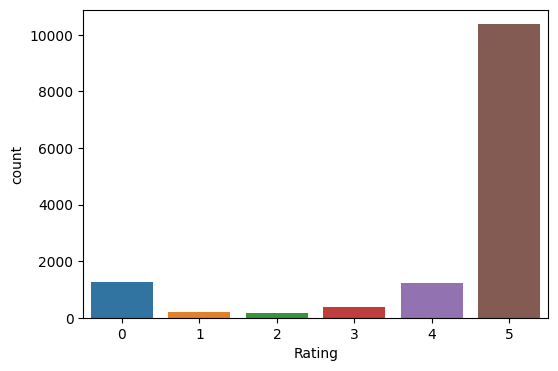

In [21]:
plt.figure(figsize=(6,4))
rating_value = data['Rating'].value_counts()
sns.countplot(x='Rating', data=data)
plt.show()

In [22]:
data['Rating'].value_counts()

Rating
5    10369
0     1272
4     1241
3      368
1      210
2      174
Name: count, dtype: int64

- Target variable is highly skewed towards rating 5

## Features

In [23]:
# plt.figure(figsize=(6,4))
# sns.scatterplot(x = 'ThumbsUpCount', y = 'ThumbsDownCount', data = data)
# plt.title('Scatter Plot')
# plt.show()

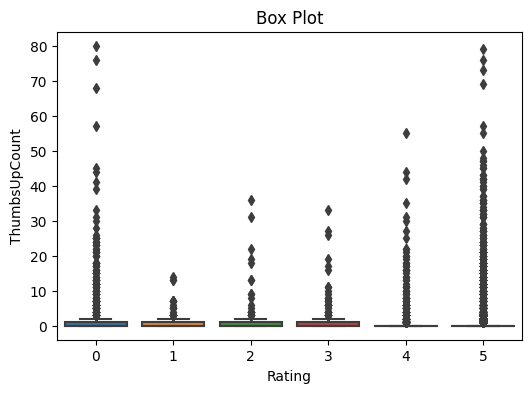

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x= 'Rating', y = 'ThumbsUpCount', data = data)
plt.title('Box Plot')
plt.show()

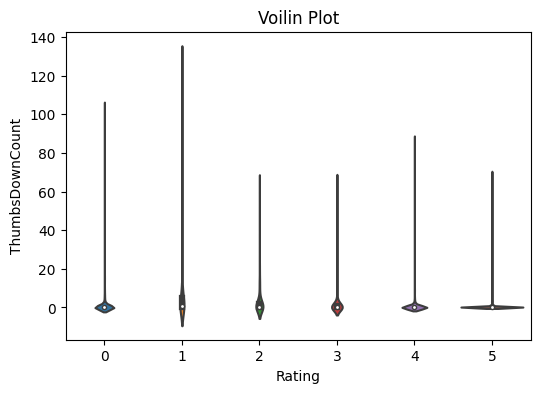

In [25]:
plt.figure(figsize=(6,4))
sns.violinplot(x= 'Rating', y = 'ThumbsDownCount', data = data)
plt.title('Voilin Plot')
plt.show()

In [26]:
numerical_features = data.select_dtypes(include = ['int64'])
numerical_features = numerical_features.drop(columns = ['CreationTimestamp'])

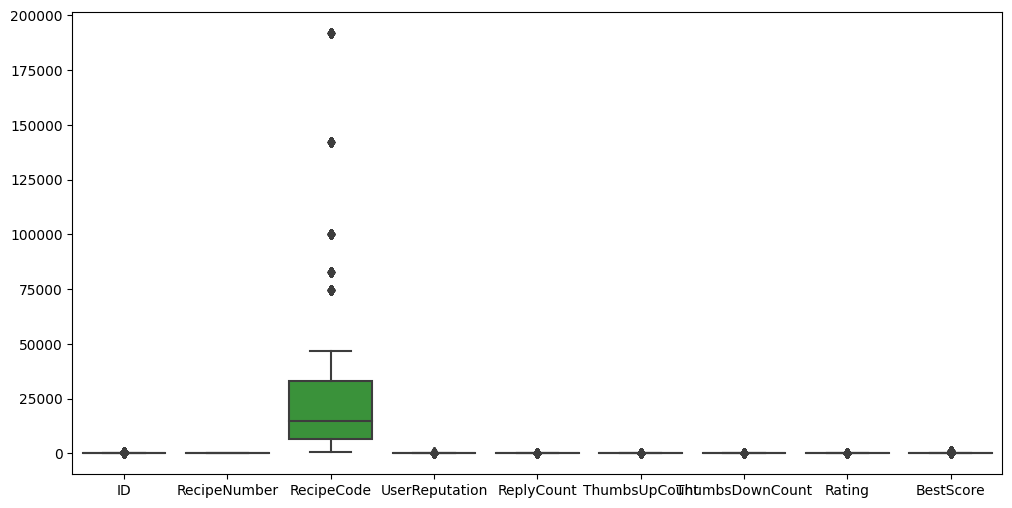

In [27]:
plt.figure(figsize = (12,6))
sns.boxplot(numerical_features)
plt.show()

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(numerical_features.corr(), annot =  True, cmap = 'coolwarm')
plt.show()

### Insights
- ThumbsUpCount and Best Score are highly correlated
- ThumbsUpCount, ThumbsDownCount and ReplyCount are related

In [ ]:
# sns.pairplot(numerical_features, diag_kind = 'kde')
# plt.show()

## Categorical Variable

In [ ]:
data['RecipeName'].unique()

array(['Banana Bars with Cream Cheese Frosting', 'Simple Taco Soup',
       'Cheeseburger Soup', 'Grilled Huli Huli Chicken',
       'Cauliflower Soup', 'Favorite Chicken Potpie',
       'Fluffy Key Lime Pie', 'Seafood Lasagna', 'Cheesy Ham Chowder',
       'First-Place Coconut Macaroons', 'Rhubarb Custard Bars',
       'Garlic Beef Enchiladas', 'Pork Chops with Scalloped Potatoes',
       'Peanut Butter Cup Cheesecake', 'Li’l Cheddar Meat Loaves',
       'Chicken Wild Rice Soup', 'Flavorful Chicken Fajitas',
       'Enchilada Casser-Ole!', 'Creamy White Chili',
       'Stuffed Pepper Soup', 'Lemon Blueberry Bread',
       'Chicken and Dumplings', 'Porcupine Meatballs',
       'Simple Au Gratin Potatoes', 'Basic Homemade Bread',
       'Zucchini Cupcake', 'Forgotten Jambalaya', 'Ravioli Lasagna',
       'Contest-Winning New England Clam Chowder', 'Basic Banana Muffins',
       'Creamy Grape Salad', 'Big Soft Ginger Cookies',
       'Pumpkin Spice Cupcakes with Cream Cheese Frosting',
 

In [ ]:
# plt.figure(figsize = (8,6))
# cat = data['RecipeName'].value_counts().head(10)
# sns.barplot(x = cat, y = cat.index)
# plt.show()

In [ ]:
# plt.figure(figsize = (8,6))
# cat = data['RecipeName'].value_counts().tail(10)
# sns.barplot(x = cat, y = cat.index)
# plt.show()

In [ ]:
# plt.figure(figsize = (8,6))
# cat = data['UserName'].value_counts().head(10)
# sns.barplot(x = cat, y = cat.index)
# plt.show()

## Textual Features

In [34]:
from wordcloud import WordCloud, STOPWORDS
text = " ".join(review for review in data['Recipe_Review'])
stopwords = set(STOPWORDS)

In [35]:
wordcloud = WordCloud(stopwords = stopwords, background_color = 'White').generate(text)

In [ ]:
plt.figure(figsize = (8,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
data['Review_Length'] = data['Recipe_Review'].apply(lambda x : len(str(x)))

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data['Review_Length'], bins=20, kde=True)
plt.show()

In [ ]:
avg_len = data.groupby('Rating')['Review_Length'].mean().reset_index()
avg_len

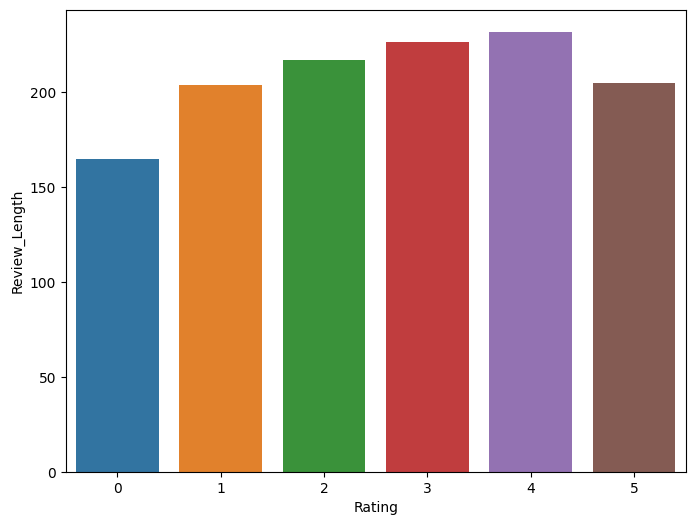

In [40]:
plt.figure(figsize=(8,6))
sns.barplot(x = avg_len['Rating'], y = avg_len['Review_Length'])
plt.show()

## Data Time

In [41]:
dt = pd.DataFrame()
dt['CreationTimestamp'] = data['CreationTimestamp'].copy()
dt['timestamp'] = pd.to_datetime(dt['CreationTimestamp'], unit='s')
dt['year'] = dt['timestamp'].dt.year
dt['month'] = dt['timestamp'].dt.month
dt['dayofweek'] = dt['timestamp'].dt.dayofweek
dt['hour'] = dt['timestamp'].dt.hour
dt = dt.drop(columns = ['CreationTimestamp', 'timestamp'])

In [42]:
dt['month'].value_counts()

month
6     12889
2       132
9        99
10       81
8        75
7        71
1        68
5        63
4        51
11       42
12       41
3        22
Name: count, dtype: int64

In [43]:
data

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review,Review_Length
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...,262
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...,406
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...,150
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...,60
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13631,115,98,11767,Quick Cream of Mushroom Soup,sp_aUSaElGf_11767_c_127710,u_1oKVbHjirkAIWwTjbt9dWyqENo2,elbay,1,1622716969,0,0,0,5,100,Delicious!! Very easy to make! One minor chang...,159
13632,372,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_196030,u_1oKXoBnyJ2ocquNYwAhs19LMSrA,PauletteInhofe,1,1622717329,0,0,0,5,100,I made this pie for my family and they loved i...,294
13633,87,37,20170,Taco Lasagna,sp_aUSaElGf_20170_c_359338,u_1oKbGr5o9tj0mQl1rkVqzWnE481,Barbaralarkin,1,1622718089,0,0,0,5,100,Very tasty!,11
13634,48,63,24886,Chicken and Dumplings,sp_aUSaElGf_24886_c_175514,u_1oKWD7Dqjmc0oYHdW8Vm3fzhxJW,SammyPrissy,1,1622717192,0,0,0,5,100,I have made this numerous times. It&#39;s so ...,62


In [44]:
dt

,year,month,dayofweek,hour
0,2021,6,3,10
1,2021,6,3,10
2,2021,6,3,10
3,2021,6,2,15
4,2021,6,3,11
...,...,...,...,...
13631,2021,6,3,10
13632,2021,6,3,10
13633,2021,6,3,11
13634,2021,6,3,10


In [45]:
data.drop(columns=['CreationTimestamp'],inplace=True)

In [46]:
data = pd.concat([data,dt],axis=1)

# Imputation

In [47]:
data.isna().sum()

ID                 0
RecipeNumber       0
RecipeCode         0
RecipeName         0
CommentID          0
UserID             0
UserName           0
UserReputation     0
ReplyCount         0
ThumbsUpCount      0
ThumbsDownCount    0
Rating             0
BestScore          0
Recipe_Review      0
Review_Length      0
year               0
month              0
dayofweek          0
hour               0
dtype: int64

In [48]:
data.shape

(13634, 19)

# Split my train into X,y

In [49]:
X = data.drop(columns=['Rating'])
y = data['Rating']

In [50]:
X

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review,Review_Length,year,month,dayofweek,hour
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,0,0,0,100,great recipe! I have made them just as written...,262,2021,6,3,10
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,0,0,1,100,This is an easy and quick recipe that is great...,406,2021,6,3,10
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,0,0,0,100,I think I was looking for something extra spec...,150,2021,6,3,10
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,0,0,0,100,This is our favorite grilled chicken recipe. ...,60,2021,6,2,15
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,0,0,0,100,Great basic recipe. I added 2 teaspoons Tuscan...,135,2021,6,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13631,115,98,11767,Quick Cream of Mushroom Soup,sp_aUSaElGf_11767_c_127710,u_1oKVbHjirkAIWwTjbt9dWyqENo2,elbay,1,0,0,0,100,Delicious!! Very easy to make! One minor chang...,159,2021,6,3,10
13632,372,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_196030,u_1oKXoBnyJ2ocquNYwAhs19LMSrA,PauletteInhofe,1,0,0,0,100,I made this pie for my family and they loved i...,294,2021,6,3,10
13633,87,37,20170,Taco Lasagna,sp_aUSaElGf_20170_c_359338,u_1oKbGr5o9tj0mQl1rkVqzWnE481,Barbaralarkin,1,0,0,0,100,Very tasty!,11,2021,6,3,11
13634,48,63,24886,Chicken and Dumplings,sp_aUSaElGf_24886_c_175514,u_1oKWD7Dqjmc0oYHdW8Vm3fzhxJW,SammyPrissy,1,0,0,0,100,I have made this numerous times. It&#39;s so ...,62,2021,6,3,10


# Train-Test Split

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [52]:
x_test.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review,Review_Length,year,month,dayofweek,hour
12439,156,20,6504,Mom’s Meat Loaf,sp_aUSaElGf_6504_c_320576,u_1oKW7yN9RJAYxle84piFTWh8neZ,whymessz,1,0,0,0,100,This is very tasty! We both loved it. I used...,271,2021,6,3,10
1121,4,46,18345,Simple Au Gratin Potatoes,sp_aUSaElGf_18345_c_261pQbLyFUyzstIFCx5hQ5DyFHL,u_EwoYVOyB4pmi,Kathryn013,1,0,16,19,679,"Although I don’t luuuurve their delivery, I ag...",879,2022,3,1,16
3900,155,16,41101,Rustic Italian Tortellini Soup,sp_aUSaElGf_41101_c_114896,u_1oKVlFhbZBKrw8Ex5Zf6AHtUMEu,ebtisam,1,0,0,0,100,amazing soup,12,2021,6,3,10
10049,19,15,10252,Li’l Cheddar Meat Loaves,sp_aUSaElGf_10252_c_405963,u_1oKcGXoveUuKbtGzyJeLSmzlo5D,Brooke Moore,1,0,0,0,100,My boyfriend absolutely loved these!,36,2021,6,3,11
12129,100,64,12700,Big Soft Ginger Cookies,sp_aUSaElGf_12700_c_143676,u_1oKWN4B6Vj9vwnTph8nwFdSWhsH,MeghanLouise,1,0,0,0,100,Followed the recipe. Resulting dough was too s...,392,2021,6,3,10


In [53]:
x_test.shape

(2727, 18)

# Preprocessing and Imputation

In [56]:
x_train['RecipeName'].unique()

array(['Winning Apple Crisp', 'Grilled Huli Huli Chicken',
       'Flavorful Chicken Fajitas', 'Cheesy Ham Chowder',
       'Stuffed Pepper Soup', 'Vegetarian Linguine',
       'Rhubarb Custard Bars', 'Rustic Italian Tortellini Soup',
       'Pineapple Orange Cake', 'Porcupine Meatballs',
       'Ham and Swiss Sliders', 'Creamy White Chili',
       'Traditional Lasagna', 'Caramel-Pecan Cheesecake Pie',
       'Moist Chocolate Cake', 'Skillet Shepherd’s Pie',
       'Enchilada Casser-Ole!',
       'Pumpkin Spice Cupcakes with Cream Cheese Frosting',
       'Favorite Chicken Potpie', 'Garlic Beef Enchiladas',
       'Smothered Chicken Breasts', 'Cheeseburger Soup', 'Cherry Bars',
       'Mom’s Meat Loaf', 'Lemon Blueberry Bread',
       'Banana Bars with Cream Cheese Frosting', 'Apple Pie',
       'Best Ever Potato Soup', 'Baked Mushroom Chicken',
       'Brown Sugar Oatmeal Pancakes', 'Amish Breakfast Casserole',
       'Pumpkin Bread', 'Corn Pudding', 'Best Ever Banana Bread',
       '

In [ ]:
num = ['UserReputation','ReplyCount','ThumbsUpCount','ThumbsDownCount','BestScore','Review_Length']
cat = ['ID','RecipeName','UserID','year', 'month', 'dayofweek', 'hour']
text = ['Recipe_Review']

In [ ]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  StandardScaler,OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
num_pipeline = Pipeline([('num_imputer',SimpleImputer(strategy='mean')),('scale',StandardScaler())])
cat_pipeline = Pipeline([('cat_imputer',SimpleImputer(strategy='most_frequent')),('onehot',OneHotEncoder(handle_unknown='ignore'))])
text_pipeline = Pipeline([('vectorizer',TfidfVectorizer())])

In [ ]:
Transformer1 = ColumnTransformer([('num_pipe',num_pipeline,num),('cat_pipe',cat_pipeline,cat)])
Transformer2 = ColumnTransformer([('text_pipe',text_pipeline,'Recipe_Review')])

In [ ]:
union = FeatureUnion([('transformer1',Transformer1),('transformer2',Transformer2)])

# HyperParameter Tuning

In [ ]:
feature_transfomation = Pipeline([('preprocessing',union),('feature_eng',SelectKBest(score_func = f_regression, k=1000))])

In [ ]:
Preprocessor = Pipeline([('preprocessing',union),('feature_eng',SelectKBest(score_func = f_regression, k=1000))])

In [ ]:
X_transformed_train = Preprocessor.fit_transform(x_train,y_train)

In [ ]:
X_transformed_train

In [ ]:
import joblib 

joblib.dump(Preprocessor,'preprocessor.joblib')

In [ ]:
type(Preprocessor)

In [ ]:
X_selected = feature_transfomation.fit_transform(x_train,y_train)
X_selected_test = feature_transfomation.transform(x_test)

In [ ]:
X_selected_pd = pd.DataFrame(X_selected)
X_selected_test_pd = pd.DataFrame(X_selected_test)

In [ ]:
X_selected.shape

## Model Training and evaluation for Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_selection import f_regression

In [ ]:
accuracies = [] #list for storing all model accuracies

In [ ]:
# Function to evaluate models

def evaluate_model(model, X_selected, y_train, X_selected_test, y_test):

    model.fit(X_selected, y_train)
    y_test_pred = model.predict(X_selected_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    report = classification_report(y_test, y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    con = confusion_matrix(y_test,y_test_pred)
    display = ConfusionMatrixDisplay(con)
    display.plot()
    return accuracy, report, conf_matrix

# Logistic Regression

In [ ]:
# Logistic Regression
lg = Pipeline([('preprocessing',union),('feature_selection',SelectKBest(score_func = f_regression, k=1000)),('model',LogisticRegression(max_iter=1000))])
lg_accuracy, lg_report, lg_conf_matrix = evaluate_model(lg, x_train, y_train, x_test, y_test)
print("Logistic Regression")
print("Accuracy:", lg_accuracy)
print("Classification Report:\n", lg_report)
# print("Classificatiprint("Confusion Matrix:\n",on Report:\n" lg_conf_matrix)
accuracies.append(lg_accuracy)

# HyperParameter Tuning

# Grid Search for LogisticRegression

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings

In [ ]:
warnings.filterwarnings('ignore')
lr_param = {
    "penalty":['l1'],
    "C": [2,5],
    "solver":['saga','liblinear']
}
grid_search_lr = GridSearchCV(LogisticRegression(),param_grid=lr_param,cv=3,n_jobs=-1,verbose=3)
grid_search_lr_accuracy, grid_search_lr_report,grid_search_lr_conf_matrix = evaluate_model(grid_search_lr, X_selected, y_train, X_selected_test, y_test)
print("HyperParameter Tuning for LogisticRegression")
print(grid_search_lr.best_params_)
print("Accuracy:", grid_search_lr_accuracy)
print("Classification Report:\n", grid_search_lr_report)
# print("Classificatiprint("Confusion Matrix:\n",on Report:\n" grid_search_lr_conf_matrix)
accuracies.append(grid_search_lr_accuracy)

# KNeighborsClassifier

In [ ]:
# KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn_accuracy, knn_report,knn_conf_matrix = evaluate_model(knn, X_selected, y_train, X_selected_test, y_test)
print("KNeighbors Classifier")
print("Accuracy:", knn_accuracy)
print("Classification Report:\n", knn_report)
# print("Classificatiprint("Confusion Matrix:\n",on Report:\n" knn_conf_matrix)
accuracies.append(knn_accuracy)

# RandomForest Classifier

In [ ]:
# RandomForest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc_accuracy, rfc_report,rfc_conf_matrix = evaluate_model(rfc, X_selected, y_train, X_selected_test, y_test)
print("RandomForest Classifier")
print("Accuracy:", rfc_accuracy)
print("Classification Report:\n", rfc_report)
# print("Classificatiprint("Confusion Matrix:\n",on Report:\n" rfc_conf_matrix)
accuracies.append(rfc_accuracy)

# GridSearchCV - SGDClassifier

In [ ]:
# Stochastic Gradient Descent Classifier
sgd = SGDClassifier(loss='log_loss',learning_rate='constant',random_state=1729)

param_grid = {
    'alpha':[0.001, 0.005],
    'eta0':[0.01, 0.1]
}
grid_sgd = GridSearchCV(sgd,param_grid,scoring='accuracy')

grid_sgd_accuracy, grid_sgd_report, grid_sgd_conf_matrix = evaluate_model(grid_sgd, X_selected, y_train, X_selected_test, y_test)
print(grid_sgd.best_params_)
print(" Stochastic Gradient Descent Classifier")
print("Accuracy:", grid_sgd_accuracy)
print("Classification Report:\n", grid_sgd_report)
# print("Classificatiprint("Confusion Matrix:\n",on Report:\n" grid_sgd_conf_matrix)
accuracies.append(grid_sgd_accuracy)

# Support Vector Classifier

In [ ]:
# Support Vector Classifier
svc = SVC(random_state=42)
svc_accuracy, svc_report, svc_conf_matrix = evaluate_model(svc, X_selected, y_train, X_selected_test, y_test)
print("Support Vector Classifier")
print("Accuracy:", svc_accuracy)
print("Classification Report:\n", svc_report)
# print("Classificatiprint("Confusion Matrix:\n",on Report:\n" svc_conf_matrix)
accuracies.append(svc_accuracy)

# LightGBM

In [ ]:
# LightGBM
lgbm = LGBMClassifier(random_state=42)
lgbm_accuracy, lgbm_report, lgbm_conf_matrix = evaluate_model(lgbm, X_selected, y_train, X_selected_test, y_test)
print("LightGBM")
print("Accuracy:", lgbm_accuracy)
print("Classification Report:\n", lgbm_report)
# print("Classificatiprint("Confusion Matrix:\n",on Report:\n" lgbm_conf_matrix)
accuracies.append(lgbm_accuracy)

In [ ]:
joblib.dump(lgbm,'model.joblib')

# XGBoost

In [ ]:
X_selected.head()

In [ ]:
# XGBoost
xgb = XGBClassifier(random_state=42)
xgb_accuracy, xgb_report, xgb_conf_matrix = evaluate_model(xgb, X_selected, y_train, X_selected_test, y_test)
print("XGBoost")
print("Accuracy:", xgb_accuracy)
print("Classification Report:\n", xgb_report)
# print("Classificatiprint("Confusion Matrix:\n",on Report:\n" xgb_conf_matrix)
accuracies.append(xgb_accuracy)

# Hyperparameter tuning

# Randomized Search for XGBoost

In [ ]:
# XGBoost
xgb_refined_params = {
    'n_estimators': [100, 110],
    'learning_rate': [0.1, 0.15],
    'max_depth': [7],
    'min_child_weight': [4],
    'colsample_bytree': [0.7]
}

grid_search_xgb_refined = RandomizedSearchCV(estimator=XGBClassifier(random_state=42), param_distributions=xgb_refined_params, cv=3, n_jobs=-1, verbose=3, random_state=42, n_iter=100)

grid_xgb_accuracy, grid_xgb_report, grid_xgb_conf_matrix = evaluate_model(grid_search_xgb_refined, X_selected, y_train, X_selected_test, y_test)

print(grid_search_xgb_refined.best_estimator_)
print("XGBoost")
print("Accuracy:", grid_xgb_accuracy)
print("Classification Report:\n", grid_xgb_report)
# print("Classificatiprint("Confusion Matrix:\n",on Report:\n" grid_xgb_conf_matrix)
accuracies.append(grid_xgb_accuracy)

# Multi-layer Perceptron

In [ ]:
# Multi-layer Perceptron
mlp = MLPClassifier(random_state=42, max_iter=1000)
mlp_accuracy, mlp_report, mlp_conf_matrix = evaluate_model(mlp, X_selected, y_train, X_selected_test, y_test)
print("Multi-layer Perceptron")
print("Accuracy:", mlp_accuracy)
print("Classification Report:\n", mlp_report)
# print("Classificatiprint("Confusion Matrix:\n",on Report:\n" mlp_conf_matrix)
accuracies.append(mlp_accuracy)

# DecisionTreeClassifier

In [ ]:
# DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 42)
dtc_accuracy, dtc_report, dtc_conf_matrix = evaluate_model(dtc, X_selected, y_train, X_selected_test, y_test)
print("DecisionTreeClassifier")
print("Accuracy:", dtc_accuracy)
print("Classification Report:\n", dtc_report)
# print("Classificatiprint("Confusion Matrix:\n",on Report:\n" dtc_conf_matrix)
accuracies.append(dtc_accuracy)

In [ ]:
# CART (Classification and Regression Trees)
cart = DecisionTreeClassifier(random_state=42)
cart_accuracy, cart_report, cart_conf_matrix = evaluate_model(cart, X_selected, y_train, X_selected_test, y_test)
print("CART")
print("Accuracy:", cart_accuracy)
print("Classification Report:\n", cart_report)
accuracies.append(cart_accuracy)

# BaggingClassifier

In [ ]:
# BaggingClassifier

models = [DecisionTreeClassifier(), KNeighborsClassifier(), LogisticRegression()]
model_names = ["DecisionTreeClassifier", "KNeighborsClassifier", "LogisticRegression"]

for model, name in zip(models, model_names):
    bag = BaggingClassifier(base_estimator=model, n_estimators=20, random_state=1729)
    bag.fit(X_selected, y_train)
    accuracy, report, conf_matrix = evaluate_model(bag, X_selected, y_train, X_selected_test, y_test)

    print(f"{name} with BaggingClassifier")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)
    #print("Confusion Matrix:\n\n", conf_matrix)


# 7. Overall Model Comparison

In [ ]:

model_names = [
    "LogisticRegression",
    "gridCV_LogisticRegression",
    "KNeighborsClassifier",
    "RandomForestClassifier",
    "SGDClassifier",
    "SVC",
    "LightGBM",
    "XGBoost",
    "Randomized_XGB",
    "MLPClassifier",
    "DecisionTreeClassifier"
    "CART"
]


# Combine model names and accuracies into a list of tuples
models_accuracies = list(zip(model_names, accuracies))

# Sort the list of tuples based on accuracies
models_accuracies.sort(key=lambda x: x[1], reverse=True)

# Unpack the sorted list of tuples back into model names and accuracies
sorted_model_names, sorted_accuracies = zip(*models_accuracies)

# Plotting ordered accuracies
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_model_names, sorted_accuracies, color='skyblue')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers (Ordered)')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Add accuracy values on top of the bars with four decimal points
for bar, accuracy in zip(bars, sorted_accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{accuracy:.4f}', ha='center', va='bottom')

plt.show()


In [ ]:
accuracies

#  8. SUBMISSION

In [ ]:
final_pipeline = Pipeline([('preprocessing',union),('feature_eng',SelectKBest(score_func = f_regression, k=1000)),('model',svc)])

## Submission

In [ ]:
test = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')

In [ ]:
dt_test = pd.DataFrame()
dt_test['CreationTimestamp'] = test['CreationTimestamp'].copy()
dt_test['timestamp'] = pd.to_datetime(dt_test['CreationTimestamp'], unit='s')
dt_test['year'] = dt_test['timestamp'].dt.year
dt_test['month'] = dt_test['timestamp'].dt.month
dt_test['dayofweek'] = dt_test['timestamp'].dt.dayofweek
dt_test['hour'] = dt_test['timestamp'].dt.hour
dt_test = dt_test.drop(columns = ['CreationTimestamp', 'timestamp'])

In [ ]:
test = pd.concat([test,dt_test],axis=1)

In [ ]:
test['Review_Length'] = test['Recipe_Review'].apply(lambda x : len(str(x)))

In [ ]:
test.columns

In [ ]:
X.columns

In [ ]:
X_final_test = feature_transfomation.transform(test)

In [ ]:
test.isna().sum()

## Fitting on whole data

In [ ]:
y_pred = xgb.predict(X_final_test)

In [ ]:
predictions_df = pd.DataFrame({'Rating': y_pred}, index=range(1, len(y_pred) + 1))
predictions_df.index.name = 'ID'
predictions_df.to_csv('submission.csv')